In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from pprint import pprint
from datetime import datetime

# I have a config file on my computer, you are going to have to add your own with the api key
from config import omdb_key

netflix_data = '/Users/rollycostillas/Desktop/upenn/homework/The-First-Project/resources/netflix_daily_top_10.csv'
netflix = pd.read_csv(netflix_data)
netflix

#netflix_titles_source = "resources/netflix_titles.csv"
#netflix_titles = pd.read_csv(netflix_titles_source)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [2]:
# show columns
netflix.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

In [3]:
# replacing missing data
# missing data
for i in netflix.columns:
    null_rate = netflix[i].isna().sum() / len(netflix) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))
        
# replace missing data
netflix['Netflix Exclusive'].replace(np.nan, 'No Data',inplace  = True)       

Netflix Exclusive null rate: 35.23%


In [5]:
netflix.isnull().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     7100 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [8]:
netflix

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,No Data,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No Data,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,No Data,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,No Data,"Mar 1, 2022",10,33


In [11]:
# count movie and tv show type
movie = netflix.loc[netflix["Type"] == "Movie"]
movie.count()

As of                   2611
Rank                    2611
Year to Date Rank       2611
Last Week Rank          2611
Title                   2611
Type                    2611
Netflix Exclusive       2611
Netflix Release Date    2611
Days In Top 10          2611
Viewership Score        2611
dtype: int64

In [12]:
tvshow = netflix.loc[netflix["Type"] == "TV Show"]
tvshow.count()

As of                   4446
Rank                    4446
Year to Date Rank       4446
Last Week Rank          4446
Title                   4446
Type                    4446
Netflix Exclusive       4446
Netflix Release Date    4446
Days In Top 10          4446
Viewership Score        4446
dtype: int64

In [25]:
# ratio of movies(m) & tv shows(t)
data_type=netflix.groupby(netflix["Type"]).count()
data_type

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
Type,,,,,,,,,
Concert/Perf…,2,2,2,2,2,2,2,2,2
Movie,2611,2611,2611,2611,2611,2611,2611,2611,2611
Stand-Up Comedy,41,41,41,41,41,41,41,41,41
TV Show,4446,4446,4446,4446,4446,4446,4446,4446,4446


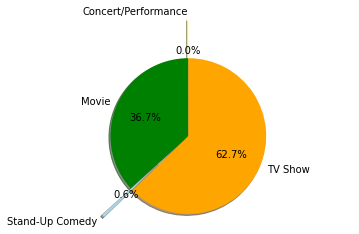

In [32]:
pies = ["Concert/Performance", "Movie", "Stand-Up Comedy", "TV Show"]
pie_votes = [2,2611,41,4466]
colors = ["yellow","green","lightblue","orange"]
explode = (0.5,0,0.5,0)

# create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig('../The-First-Project/pie_type.png')
plt.show()

In [35]:
# Look at the top 10 list on 4/21/2020
netflix.loc[netflix["As of"] == "2020-04-21"]

# Look at all the shows that were at number 1
netflix.loc[netflix["Rank"] == 1]

# Get the list of unique titles
titles_top_10 = netflix["Title"].unique()

# We are going to get a list of days those titles were in the top 10, we start with an empty list
max_days_in_top_10 = []

# Loop through the titles and get the max number of days it was in the top 10 (This would be the total number of days it shows up)
for title in titles_top_10:
    max_days_in_top_10.append(netflix["Days In Top 10"].loc[netflix["Title"] == title].max())

max_days_in_top_10

# Turn that into a dataframe
max_days_in_top_10_df = pd.DataFrame({"Title":titles_top_10, "Max Days In Top 10":max_days_in_top_10})
max_days_in_top_10_df

,Title,Max Days In Top 10
0,"Tiger King: Murder, Mayhem …",37
1,Ozark,89
2,All American,66
3,Blood Father,7
4,The Platform,10
...,...,...
640,Against the Ice,2
641,The Weekend Away,6
642,Pieces of Her,7
643,Shrek,7


In [33]:
# distribution of ratings by type
order = pd.DataFrame(data_type.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

KeyError: 'rating'

In [ ]:
# Get a list of all of the dates in the dataset

date_raw = netflix["Netflix Release Date"].unique()
dates = []

# Convert the dates to datetime objects so that we can sort them in order
for date in date_raw:
    dates.append(datetime.strptime(date, '%b %d, %Y'))

dates.sort()

#remove the first one, since it is an outlier
dates.pop(0)
    
# Set up an empty list that we can add to as we go through the loop
average_ranking = []

# Note that the list dates contains a list of datetime objects, we use .strftime to convert it back
# to the format that the dataset uses
for date in dates:
    average_ranking.append(netflix["Rank"].loc[netflix["Netflix Release Date"] == date.strftime('%b %d, %Y')].mean())
    
plt.scatter(dates, average_ranking)
plt.xlabel("Netflix Release Date")
plt.ylabel("Average Ranking")
plt.title("Average Ranking by Release Date")

plt.show()

In [ ]:
# This counts how many titles were released on each day

# I just realized that this counts how many times entries with that release date appear
# So titles that appear multiple times in the dataset count multiple times, so this data is a bit useless

released = []

for date in dates:
    released.append(netflix["Title"].loc[netflix["Netflix Release Date"] == date.strftime('%b %d, %Y')].count())
    
plt.scatter(dates, released)
plt.xlabel("Netflix Release Date")
plt.ylabel("Number of Shows Released")
plt.title("Number of Shows Released by Date")
plt.show()

In [ ]:
# I was trying to split the dates by month and get total rankings for each month
# It didn't work, don't know why

jan_dates = []
feb_dates = []
mar_dates = []
apr_dates = []
may_dates = []
jun_dates = []
jul_dates = []
aug_dates = []
sep_dates = []
oct_dates = []
nov_dates = []
dec_dates = []

for date in dates:
    if date.strftime("%m") == "01":
        jan_dates.append(date)
    elif date.strftime("%m") == "02":
        feb_dates.append(date)
    elif date.strftime("%m") == "03":
        mar_dates.append(date)
    elif date.strftime("%m") == "04":
        apr_dates.append(date)
    elif date.strftime("%m") == "05":
        may_dates.append(date)
    elif date.strftime("%m") == "06":
        jun_dates.append(date)
    elif date.strftime("%m") == "07":
        jul_dates.append(date)
    elif date.strftime("%m") == "08":
        aug_dates.append(date)
    elif date.strftime("%m") == "09":
        sep_dates.append(date)
    elif date.strftime("%m") == "10":
        oct_dates.append(date)
    elif date.strftime("%m") == "11":
        nov_dates.append(date)
    elif date.strftime("%m") == "12":
        dec_dates.append(date)

month_list = [jan_dates, feb_dates,mar_dates,apr_dates,may_dates,jun_dates,jul_dates,aug_dates,sep_dates,oct_dates,nov_dates,dec_dates]

months = ["January","Feburary","March","April","May","June","July","August","September","October","November","December"]
monthly_rankings = []

for month in month_list:
    temp_rankings = []
    for date in month:
        temp_rankings.append(netflix["Rank"].loc[netflix["Netflix Release Date"] == date.strftime('%b %d, %Y')].mean())
        
    monthly_rankings.append(sum(temp_rankings) / len(temp_rankings))
    
monthly_rankings

    
netflix.loc[netflix["Netflix Release Date"] == dec_dates[1].strftime('%b %d, %Y')].mean()
dec_dates[1].strftime('%b %d, %Y')


In [ ]:
# Here we use the omdb API to get some extra info on all of our titles, just saving the json file to a dictionary for now

titles = netflix["Title"].unique()
json_data = {}
url = "http://www.omdbapi.com/?t="
api_key = url + omdb_key

for title in titles:
    response = requests.get(url + title + api_key)
    data = response.json()
    json_data[title] = data

In [ ]:
# the first entry in titles is for Tiger King, so I just do this instead of writing it's name over and over
tiger_king_times = netflix["As of"].loc[netflix["Title"] == titles[0]]
tiger_king_datetime = []
tiger_king_rank = netflix["Rank"].loc[netflix["Title"] == titles[0]]

# I get a list times and convert them to datetime objects
for time in tiger_king_times:
    tiger_king_datetime.append(datetime.strptime(time, '%Y-%m-%d'))
    
scatter = plt.scatter(x=tiger_king_times,y=tiger_king_rank)
ax = scatter.axes

# Invert axis so that 1 is on top
ax.invert_yaxis()

# Here I'm trying to get a list of all the unique dates and turn them into datetime objects so I can sort them
# The intent here is to build a dataframe with all the dates in a single column and then rankings on that date for an individual show in another 
# You can probably give it a column for every show to make graphing a shows change in position over time easier
as_of_dates = netflix["As of"].unique()
as_of_datetime = []

for date in as_of_dates:
    as_of_datetime.append(datetime.strptime(date,'%Y-%m-%d'))
as_of_datetime.sort()

tiger_king_rank_and_date = netflix[["As of","Rank"]].loc[netflix["Title"] == titles[0]]
tiger_king_rank_and_date["Rank"].loc[tiger_king_rank_and_date]

In [ ]:
# Look at the top 10 list on 4/21/2020
netflix.loc[netflix["As of"] == "2020-04-21"]

# Look at all the shows that were at number 1
netflix.loc[netflix["Rank"] == 1]

# Get the list of unique titles
titles_top_10 = netflix["Title"].unique()

# We are going to get a list of days those titles were in the top 10, we start with an empty list
max_days_in_top_10 = []

# Loop through the titles and get the max number of days it was in the top 10 (This would be the total number of days it shows up)
for title in titles_top_10:
    max_days_in_top_10.append(netflix["Days In Top 10"].loc[netflix["Title"] == title].max())

max_days_in_top_10

# Turn that into a dataframe
max_days_in_top_10_df = pd.DataFrame({
    "Title":titles_top_10,
    "Max Days In Top 10":max_days_in_top_10
})

# Look at Tiger King's ranking
max_days_in_top_10_df.loc[max_days_in_top_10_df["Title"] == "Tiger King: Murder, Mayhem …"]

In [ ]:
# 72 titles were not reconized by the API, here is a list of all of them 
# Its short enough that we could enter it in manually if we really wanted to
titles_not_found = []

for title in titles:
    if json_data[title]['Response'] == 'False':
        titles_not_found.append(title)
        
titles_not_found

In [ ]:
# The goal here is to turn the json data we got from the api into a dataframe and save it as a csv file, then merge it
# So I first find the all the different pieces of data that json_data contains
columns = []

for title in titles:
    for entry in json_data[title]:
        if entry not in columns:
            columns.append(entry)
columns

In [ ]:
# Now that I know all the different pieces of data I can make a dictionary that I'll turn into a dataframe

omdb_data_dict = {
 'Title': [],
 'Response': [],
 'Error': [],
 'OMDB_Title': [],
 'Year' : [],
 'Rated' : [],
 'Released' : [],
 'Runtime' : [],
 'Genre' : [],
 'Director' : [],
 'Writer' : [],
 'Actors' : [],
 'Plot' : [],
 'Language' : [],
 'Country' : [],
 'Awards' : [],
 'Poster' : [],
 'Ratings' : [],
 'Metascore' : [],
 'imdbRating' : [],
 'imdbVotes' : [],
 'imdbID' : [],
 'Type' : [],
 'totalSeasons' : [],
 'DVD' : [],
 'BoxOffice': [],
 'Production': [],
 'Website': []
}

# loop through all the titles that we have
for title in titles:
    # Then loop through all the keys in the dictionary that we're trying to create
    for key in omdb_data_dict:
        
        # If the title in json_data doesn't have the appropriate column then I want to add N/A as a string so the lists 
        # in the dictionary are all the same length so it can all be put into a dataframe
        # I use N/A since thats what the api uses for missing data so its consistent
        try:
            omdb_data_dict[key].append(json_data[title][key])
        except:
            
            # I don't want to fill the title column with N/A since I want to merg on that later 
            if key == "Title":
                omdb_data_dict[key].append(title)                
            else:
                omdb_data_dict[key].append("N/A")
                
        
            
# With the dictionary complete let's turn it into a dataframe

omdb_df = pd.DataFrame(omdb_data_dict)
omdb_df.to_csv("resources/netflix-daily-top-10-plus-omdb-data.csv")
omdb_df


In [ ]:
# This code finds the list of genres mentioned in the netflix-titles csv file


genres = []

# The listed_in column is a string containing the netflix catagories it was in seperated by commas, so they get split up and added to the genres list
netflix_titles["listed_in"].unique()

for listed in netflix_titles["listed_in"].unique():
    for element in listed.split(","):
        genres.append(element)

# Then we don't want repeats       
genres_cleaned = []
for element in genres:
    if element not in genres_cleaned:
        genres_cleaned.append(element.strip())


genres_cleaned        
